In [150]:
from qiskit.providers.aer import AerSimulator
from qiskit import QuantumCircuit
import qiskit.visualization as viz
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [151]:
sns.set_theme()

# Bit vs Qubit.


Sabemos que podemos expresar cualquier númeor en sus potencias de 10. Es decir si quisieramos expresar el número 4325 en sus potencias de dies haríamos algo así:

$$(4*10^3)+(3*10^2)+(2*10^1)+(5*10^0)$$


En orden de entender el cómputo cuántico es ideal revisar el cómputo clásico y su funcionamiento. La idea principal para entender el cómputo clásico es que todas las unidades son binarias, 0 y 1, que representan si por un transistor está pasando electricidad o no.

Los sistemas numéricos, o bases numéricas con las que definimos nuestros números nos permiten expresar diferentes cantidades.


In [152]:
# Números decimales están en base 10.
decimal = 119
base  = (9*(10**0))+(1*(10**1))+(1*(10**2))
base


119

In [153]:
# Binarios están en base dos.
binarios = 1011 # Es el once binario
base = (1*(2**3))+ (0*(2**2))+ (1*(2**1))+ (1*(2**0))
test= 0b1011
assert base == test  #11== 11
print(base,test)

11 11


In [154]:
# El sistema hexadecimal, cuenta hasta 16, a partir de 10 = A, 11=B... F=15
hexadecimal = 0xA4F6
base  = (10*(16**3))+(4*(16**2))+(15*(16**1))+ (6*(16**0))
base # 42230
print(hexadecimal) #  42230

42230


Sabemos que la representación en un computador clásico de los valores que podemos representar en un paquete de 8 números, o byte es $2^8$ lo que nos da 256 bits. Pero cada representación en binario habla de un solo número o caracter. En cómputadores cuánticos debido al entrelazamiento y la superposición, podemos representar de 0 a 256 de manera simultánea.

## Circuitos


En el cómputo clásico usamos diagramas de circuitos que expresa como uan data entra se procesa mediante alguna operación y genera una salida. Esta misma idea se peude llevar a la copmutación cuántica donde del lado izquierdo tenemos una entrada y a la derecha una salida, las computertas se llaman así por razones historicas.

### Creando un circuito con Qiskit

La clase "QuantumCircuit" es un conjunto de instrucciones para resentar circuitos cuánticos en términos de bits. 

- `qc = QuantumCircuit(4, 3)` es un constructor de python que le dice a la máquina que aparte 3 bits para representar el circuito. qc, será la notación para nuestro QuantumCircuit object.

Para crear un circuito es crucial decirle la cantidad de qubits que tendrá neustro circuito, y de manera opcional podemos decirle cuantos clásicos tendra, lo que nos interesa es almacenar las medicioens que hacemos en bits cláscios de informació.


En todo circuito cuántico:

1. Hacemos un encodign del input
2. Hacemos el cómputo
3. Extraemos un Output



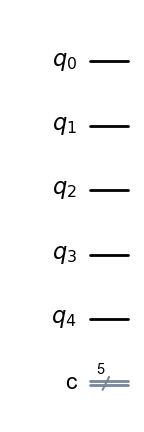

In [155]:
# Creemos nuestro circuito vacío.
qc = QuantumCircuit(5,5)
qc.draw('mpl')


### Encoding

Podmeos añadir a nuestro circuito "medidas" que será un método que nos facilitraá realizar las mediciones de nuestro circuito.

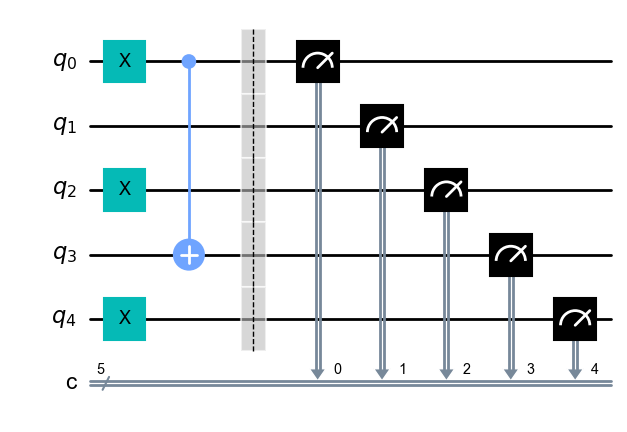

In [156]:
#qc.measure([0,1,2],[ n for n in range(0,3)])
qc.x([0,2,4])
qc.cx(0,3)
qc.barrier()
qc.measure([0,1,2,3,4],[0,1,2,3,4])  # Medimos los 3 primeros Qubits
qc.draw('mpl')

### Usando un Simulador

Es posible realizar simulaciones de un computador cuántico en uno clásico, sin embargo a partir de 30 qubits en adelante no pdoremos realizar más esta simulación. ` AerSimulator` Es el objeto que vamos a precisar para realizar una simulación. Debdodp a que las ejecuciones son aleatorias los resultados del simulador se corren por convención 1024 veces.

In [157]:
simulator = AerSimulator()
simulator

AerSimulator('aer_simulator')

In [158]:
# Pasamos nuestro circuito como parámetro y ejecutamos el método run al objeto.
job = simulator.run(qc)
results = job.result()

In [159]:
results.get_counts()

{'11101': 1024}

### Process

En este punto es posible realizar procesamiento, es decir tomar un input que tenemos codificado y lo podemos converir en un output que nos diga algo nuevo. En este caso empecemos recreando los circuitos digitales como un circuito para la suma o un **Adder**.
